# Feature selection

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance. Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. 

Having irrelevant features in your data can decrease the accuracy of many models, especially linear  algorithms like linear and logistic regression. 

Three benefits of performing feature selection before modelling your data are:

- **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
- **Improves Accuracy**: Less misleading data means modelling accuracy improves.
- **Reduces Training Time**: Less data means that algorithms train faster.

You can learn more about feature selection with scikit-learn in the article <a href="https://scikit-learn.org/stable/modules/feature_selection.html">Feature selection</a>. 

Each feature selection recipe will use the Pima Indians onset of diabetes dataset.  Let us begin with *Univariate Selection*.

# 1. Filter-based feature selection

We will cover some filter-based feature selection methods in this lab to demonstrate how you can apply them.  We first load our favourite classification data set, the Pima Indian Diabetes dataset. As before we also import Pandas and numpy to load our data and set some display options.

In [1]:
from pandas import read_csv
from numpy import set_printoptions

filename = './data/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = read_csv(filename, names=names)

array = data.values

X = array[:,0:8]
Y = array[:,8]

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

## Univariate Selection. 

Statistical tests can be used to select those features that have the strongest relationship with the output variable. One simple approach is to measure the amount of variance in our features and remove those with low variance.

The ```VarianceThreshold``` feature selection algorithm looks only at the features (X), not the desired target (y), and can therefore be used for unsupervised learning scenarios. You can find out more from the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html">API documentation</a>

In [2]:
# Variance
from sklearn.feature_selection import VarianceThreshold

threshold_n=0.95

sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))

vt = sel.fit(X)
print(vt)

VarianceThreshold(threshold=0.04750000000000004)


We can now inspect which features were above our threshold in terms of their variance. 

In [3]:
import numpy as np 

# Plot the features that were above the threshold
print(X[:, vt.variances_ > threshold_n])

# Return the index of the features that were kept.
idx = np.where(vt.variances_ > threshold_n)[0]
print(idx)

# Create a mask to show which of our features will be selected
mask = vt.variances_ > threshold_n
print(mask)

[[  6.  148.   72.  ...   0.   33.6  50. ]
 [  1.   85.   66.  ...   0.   26.6  31. ]
 [  8.  183.   64.  ...   0.   23.3  32. ]
 ...
 [  5.  121.   72.  ... 112.   26.2  30. ]
 [  1.  126.   60.  ...   0.   30.1  47. ]
 [  1.   93.   70.  ...   0.   30.4  23. ]]
[0 1 2 3 4 5 7]
[ True  True  True  True  True  True False  True]


## Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

The scikit-learn library provides the *SelectKBest* class that can be used with a 
suite of different statistical tests to select a specific number of features. Details of the *SelectKBest*
class is available at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest">here</a>.

The code block below uses the chi-squared ($\chi^2$) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarise scores
set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

# summarise selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): 
`plas`, `test`, `mass` and `age`. 

You can get the names for the chosen attributes by manually mapping the index of the 4 highest scores to the index of the attribute names.

# 2. Wrapper method

## Recursive Feature Elimination
Recursive Feature Elimination (RFE) works by recursively removing attributes and building a model on those attributes that remain. 

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. You can learn more about the *RFE* class in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html">scikit-learn documentation</a>. 

The code block below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is consistent:

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("The feature labels: %s " % names[:8])
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
The feature labels: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'] 
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


## Data Reduction using Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. 

A property of *PCA* is that you can choose the number of dimensions or principal components in the transformed result. In the 
example below, we use *PCA* and select 3 principal components. Learn more about the *PCA* class in  scikit-learn by reviewing the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">API documentation</a>.


In [11]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [12]:
print("Explained Variance: %s" % fit.explained_variance_ratio_)

Explained Variance: [0.889 0.062 0.026]


As you can see, we now have a list of our components, as well as the variance explained by the first three components, we have also reduced the dimensions of our data:

In [8]:
# Original dimensions
print(data.shape)

# Reduced dimensions
print(fit.components_.shape)
print(fit.components_)

(768, 9)
(3, 8)
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


This is a very simple example of PCA, in practice you might actually need to apply some kind of scaling or normalisation before you apply PCA.  This is because we are interested in the components that maximise the variance. 

If one component varies less than another due to their scales (e.g. comparing centimetres with millimetres), PCA might judge the direction of maximal variance incorrectly. Below is a plot of our components without scaling:

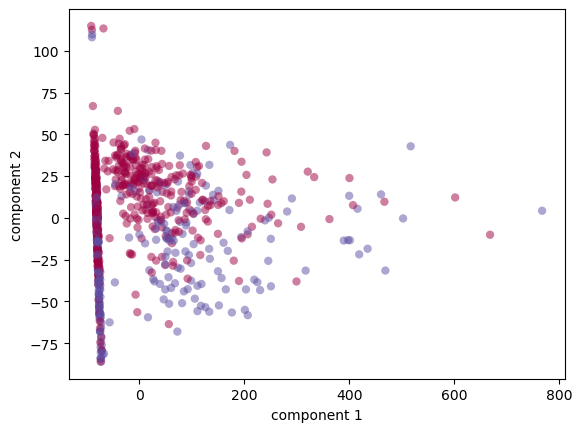

In [14]:
import matplotlib.pyplot as plt
import matplotlib

pca = PCA(n_components=2)

projected = pca.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1],
            c=data['class'], edgecolor='none', alpha=0.5,
            cmap = matplotlib.colormaps['Spectral'])
            #cmap=plt.cm.get_cmap('Spectral', 2))



plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()



You will notice that the data points are all bunched together and somewhat skewed to one side of the plot, this is because there are features with varying scale and ranges.

If we now fit a ```StandardScaler``` and then transform our data, before we pass the result to PCA, we will obtain a better view of the components:

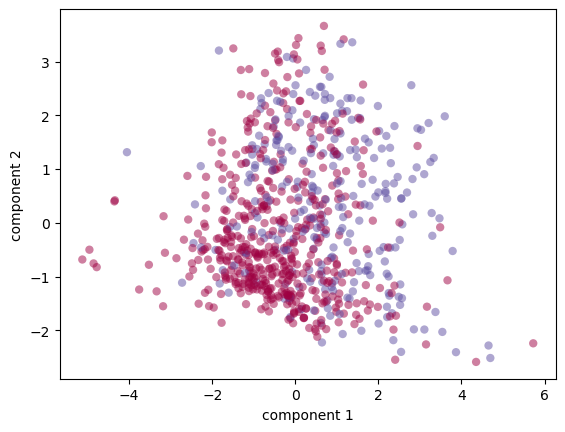

Explained Variance: [0.262 0.216]


In [18]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)



X_standardised =  StandardScaler().fit_transform(X)

fit = pca.fit(X_standardised)

projected = pca.fit_transform(X_standardised)

plt.scatter(projected[:, 0], projected[:, 1],
            c=data['class'], edgecolor='none', alpha=0.5,
            cmap = matplotlib.colormaps['Spectral'])
            #cmap=plt.cm.get_cmap('Spectral', 2))

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

print("Explained Variance: %s" % fit.explained_variance_ratio_)

As you can see the data points are more dispersed and it is easy to see the two clusters representing our classes in our data.